In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm

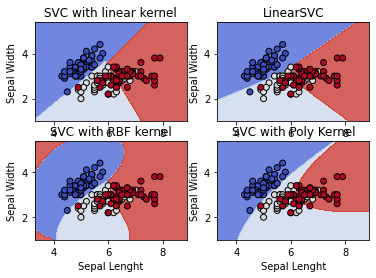

In [16]:
def make_meshgrid(x, y, h = 0.02):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target
C = 1.0

models = (svm.SVC(kernel = "linear", C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel = "rbf", C=C, gamma = 0.7),
          svm.SVC(kernel = "poly", degree = 3, gamma = 'auto', C=C),
)
models = [clf.fit(X,y) for clf in models]
titles = ("SVC with linear kernel",
          "LinearSVC",
          "SVC with RBF kernel",
          "SVC with Poly Kernel",
)

fig, sub = plt.subplots(2,2)
xx, yy = make_meshgrid(X[:,0],X[:,1])

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha = 0.8)
    ax.scatter(X[:,0], X[:,1], c=y, edgecolors = 'k', cmap=plt.cm.coolwarm)
    ax.set_xlabel("Sepal Lenght")
    ax.set_ylabel("Sepal Width")
    ax.set_title(title)

plt.show()